## Bloch sphere for Qibo

This is a tutorial to learn how to use the Bloch sphere implemented in `qibo`!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline 

from qibo import Circuit, gates
from qibo.ui.bloch import BlochSphere

First of all, let's `plot` an empty Bloch sphere.

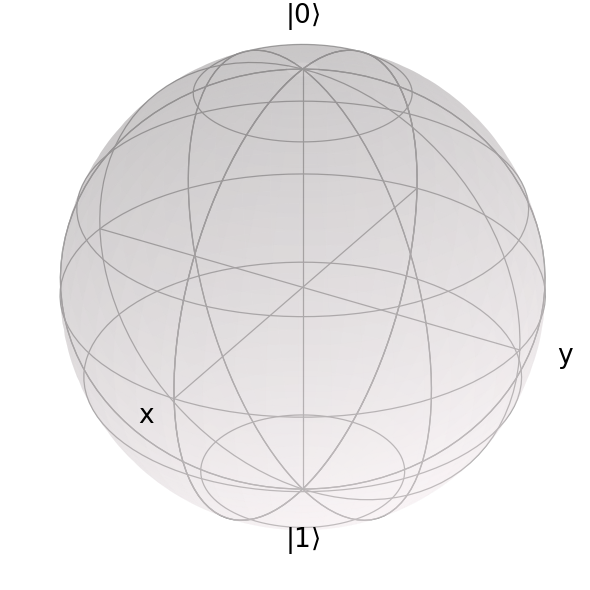

In [2]:
bs = BlochSphere()
bs.render()
plt.show()

Maybe the sphere is slightly too big: let's change its size.

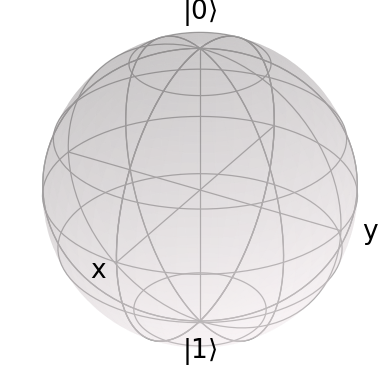

In [3]:
STYLE = {
    "figure.figsize": (4, 4),
    "lines.linewidth": 0.9}

bs = BlochSphere(STYLE=STYLE)
bs.render()
plt.show()

It is possible to add vectors to the sphere with two functions: 

(1) `add_state`: this function allows to add to the sphere the output of a Qibo circuit; \
(2) `add_vector`: this function allows to add to the sphere a vector with three components x, y, z;

For both functions it is possible to specify:

a. the desired `color`; \
b. the representation `mode`, which can be either `point` or `vector`.

Let's see these two functions in action.

[Qibo 0.2.22|INFO|2025-12-09 14:42:16]: Using qibojit (numba) backend on /CPU:0


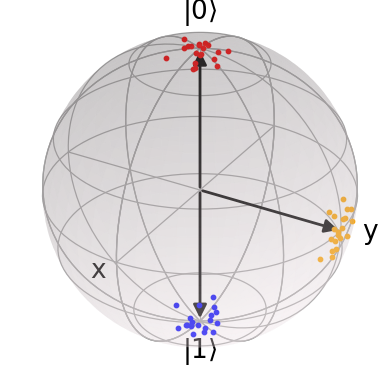

In [4]:
bs.clear()
bs.add_state(np.array([1, 0]), color="black")
bs.add_state(np.array([0, 1]), color="black")
bs.add_vector(np.array([0, 1, 0]), color="black")

weight = 0.1

def _circuit(weight, boolean=False):
    circ = Circuit(1, density_matrix=boolean)
    circ.add(gates.RY(q=0, theta=np.random.randn() * weight))
    circ.add(gates.RX(q=0, theta=np.random.randn() * weight))
    circ.add(gates.RZ(q=0, theta=np.random.randn() * weight))
    return circ

for i in range(20):
    state = _circuit(weight)(np.array([1, 0], dtype="complex")).state()
    bs.add_state(state, mode="point", color="red")

for i in range(20):
    circ = _circuit(weight)
    circ.add(gates.RX(q=0, theta=-np.pi / 2))
    bs.add_state(circ().state(), mode="point", color="orange")

for i in range(20):
    circ = _circuit(weight)
    state = circ(np.array([0, 1], dtype="complex")).state()
    bs.add_state(state, mode="point", color="blue")

bs.render()
plt.show()

We can plot mixed states, which lie inside the sphere and not on the surface.\
In the following cell I will plot: (1) the maximally mixed state (purple dot), (2) mixed states on the z-axis, (3) mixed states on the y-axis (red dots), (4) mixed state on the x-axis (blue dots).

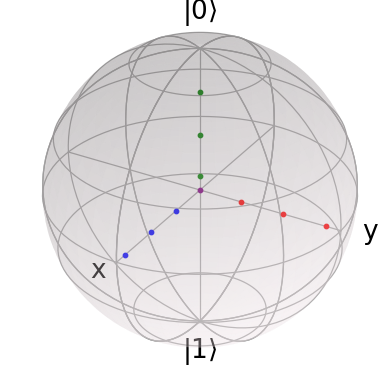

In [5]:
bs.clear()

# Maximally mixed state
maximally_mixed_state = np.array([[0.5, 0], [0, 0.5]], dtype="complex")
bs.add_state(maximally_mixed_state, mode="point", color="purple")

# Partially mixed state on the z axis
for i in range(3):
    partially_mixed_state = np.array([[1.0-0.15*(i+1), 0.0], [0.0, 0.15*(i+1)]], dtype="complex")
    bs.add_state(partially_mixed_state, mode="point", color="green")

# Partially mixed state on the x axis
for j in range(3):
    partially_mixed_state = np.array([[0.5, 0.15*(j+1)], [0.15*(j+1), 0.5]], dtype="complex")
    bs.add_state(partially_mixed_state, mode="point", color="blue")

# Partially mixed state on the y axis
for j in range(3):
    partially_mixed_state = np.array([[0.5, -1j*0.15*(j+1)], [1j*0.15*(j+1), 0.5]], dtype="complex")
    bs.add_state(partially_mixed_state, mode="point", color="red")

bs.render()
plt.show()